Preparing and first look

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV


data = pd.read_excel('Symulacja granulacji.xlsx')
data = data.drop('Recipe Composition', axis=1)

data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%H:%M:%S')
data['Seconds'] = data['Timestamp'].dt.hour * 3600 + data['Timestamp'].dt.minute * 60 + data['Timestamp'].dt.second
data['Seconds'] = data['Seconds'].astype(float)
data = data.drop('Timestamp', axis=1)
data['PDI Value'] = data['PDI Value'].fillna(0)

data.head()

,Lot Number,Product Code,Pre-granulation Temperature,Granulation Temperature,Granulator Knife Position,Roller Pressure,Granulator Current,Feeder Speed,Cooling Temperature,Ambient Temperature,Cooling Exit Temperature,Post-cooling Temperature,Roller Position,PDI Value,Seconds
0,20230702001,Product001,19.102723,20.000000,80.000000,10.000000,204.254584,23.904257,17.605290,27.919319,17.883719,17.641538,5.000000,0.0,0.0
1,20230702001,Product001,19.848752,20.521008,76.842105,15.789474,266.879002,16.988651,19.467410,26.554655,21.709199,22.884712,4.742105,0.0,1.0
2,20230702001,Product001,19.584150,21.042017,73.684211,21.578947,243.111189,19.171291,19.361612,24.683341,22.537633,19.011206,4.484211,0.0,2.0
3,20230702001,Product001,19.736620,21.563025,70.526316,27.368421,237.802899,24.109508,22.036984,22.852773,21.276738,21.142150,4.226316,0.0,3.0
4,20230702001,Product001,19.348059,22.084034,67.368421,33.157895,209.150214,24.395416,22.741485,29.878323,19.096711,18.179267,3.968421,0.0,4.0


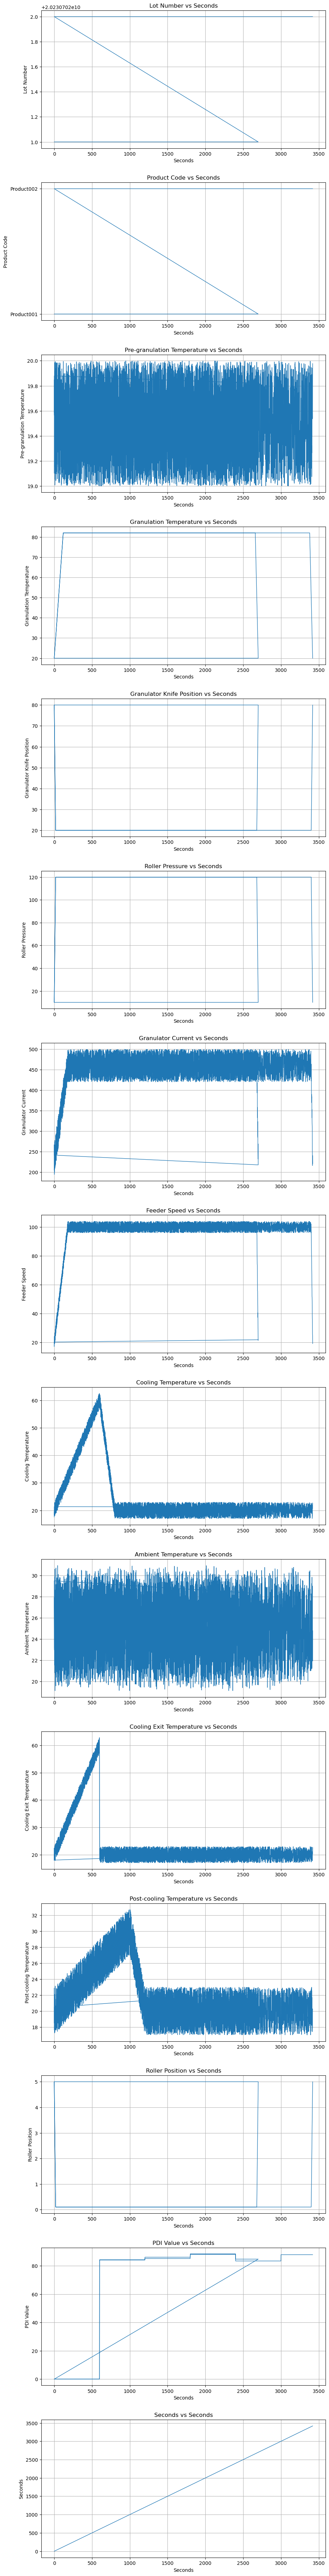

In [114]:
columns = data.columns.tolist()

fig, axes = plt.subplots(len(columns), 1, figsize=(10, len(columns) * 5))
fig.tight_layout(pad=5.0)

for i, column in enumerate(columns):
    axes[i].plot(data['Seconds'], data[column], linestyle='-', linewidth=1)
    axes[i].set_title(f'{column} vs Seconds')
    axes[i].set_xlabel('Seconds')
    axes[i].set_ylabel(column)
    axes[i].grid(True)

plt.show()

In [115]:
max_pdi_index = data['PDI Value'].idxmax()
max_pdi_row = data.loc[max_pdi_index]

print("MAX PDI VALUES':")
print(max_pdi_row)

MAX PDI VALUES':
Lot Number                     20230702002
Product Code                    Product002
Pre-granulation Temperature      19.130062
Granulation Temperature               82.0
Granulator Knife Position             20.0
Roller Pressure                      120.0
Granulator Current               448.30042
Feeder Speed                     98.412982
Cooling Temperature              20.331683
Ambient Temperature              23.177356
Cooling Exit Temperature         17.714623
Post-cooling Temperature         21.806592
Roller Position                        0.1
PDI Value                        88.534035
Seconds                             1800.0
Name: 4500, dtype: object


In [116]:
data['PDI Value'] = data['PDI Value'].round(0)
data.head()

,Lot Number,Product Code,Pre-granulation Temperature,Granulation Temperature,Granulator Knife Position,Roller Pressure,Granulator Current,Feeder Speed,Cooling Temperature,Ambient Temperature,Cooling Exit Temperature,Post-cooling Temperature,Roller Position,PDI Value,Seconds
0,20230702001,Product001,19.102723,20.000000,80.000000,10.000000,204.254584,23.904257,17.605290,27.919319,17.883719,17.641538,5.000000,0.0,0.0
1,20230702001,Product001,19.848752,20.521008,76.842105,15.789474,266.879002,16.988651,19.467410,26.554655,21.709199,22.884712,4.742105,0.0,1.0
2,20230702001,Product001,19.584150,21.042017,73.684211,21.578947,243.111189,19.171291,19.361612,24.683341,22.537633,19.011206,4.484211,0.0,2.0
3,20230702001,Product001,19.736620,21.563025,70.526316,27.368421,237.802899,24.109508,22.036984,22.852773,21.276738,21.142150,4.226316,0.0,3.0
4,20230702001,Product001,19.348059,22.084034,67.368421,33.157895,209.150214,24.395416,22.741485,29.878323,19.096711,18.179267,3.968421,0.0,4.0


Correlation X

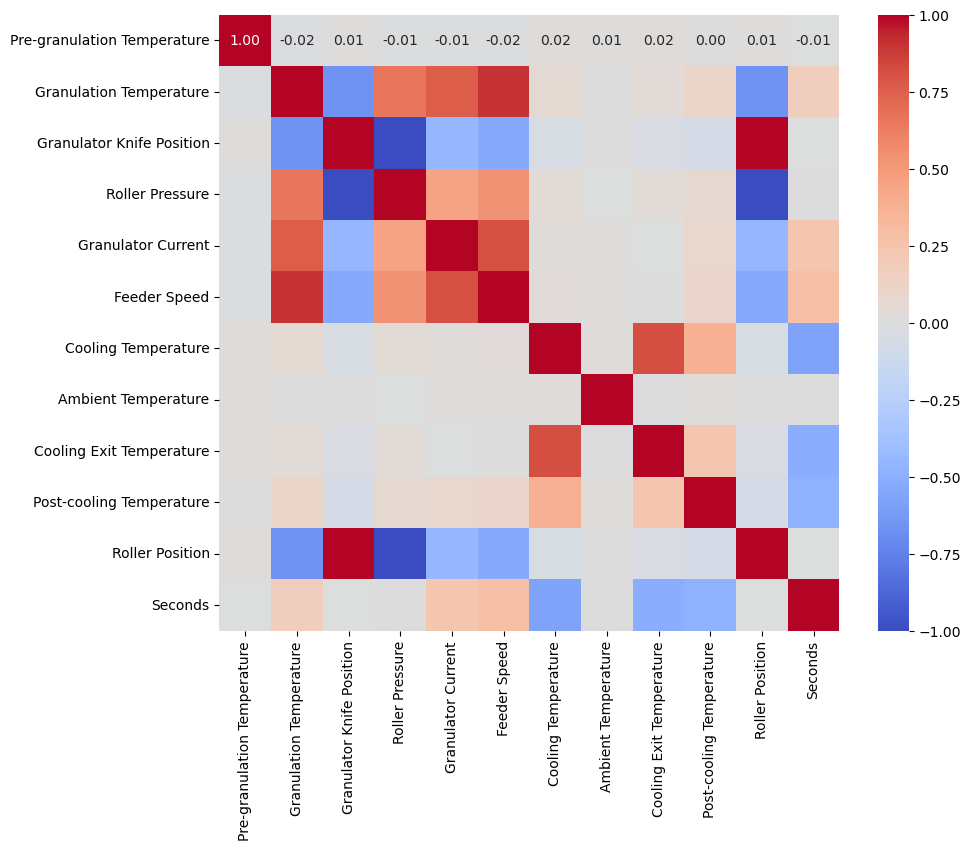

In [117]:
correlation_matrix = data.drop(columns=['PDI Value', 'Product Code', 'Lot Number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')

plt.show()

PCA

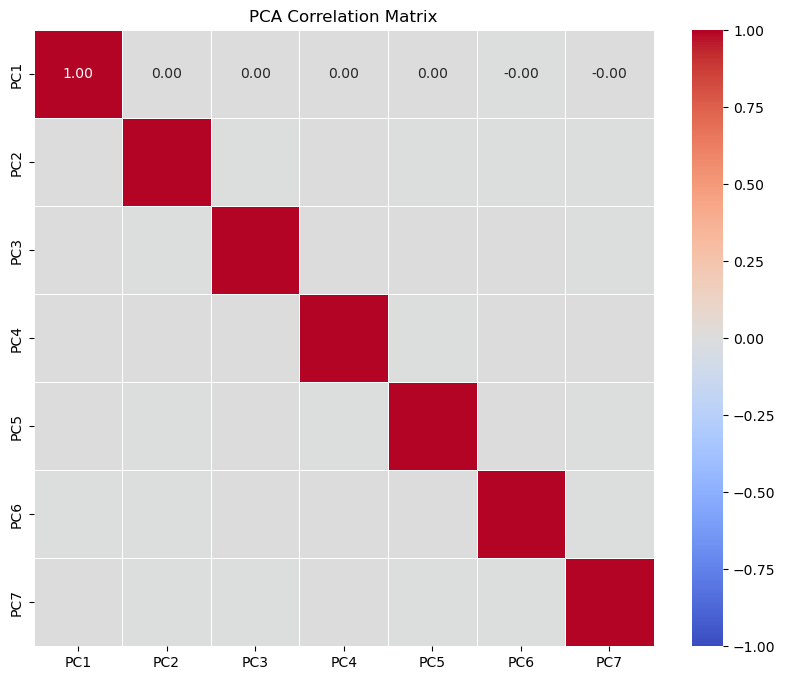

In [118]:
data = data.drop(['Lot Number', 'Product Code'], axis=1)

X = data.drop(columns=['PDI Value'])
y = data['PDI Value']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

correlation_matrix_pca = pca_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix_pca, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)

plt.title('PCA Correlation Matrix')
plt.show()

Division of data into training and testing

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

Results MSE, R^2, MAE for models

In [120]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'R^2': r2,
        'MAE': mae
    }

results_df = pd.DataFrame(results).T
print("Model evaluation results without hyperparameter tuning:")
print(results_df)

Model Evaluation Results without Hyperparameter Tuning:
                          Mean Squared Error  R^2 Score  Mean Absolute Error
Linear Regression                 194.829544   0.836899            10.273930
Ridge Regression                  194.833271   0.836896            10.273310
Lasso Regression                  202.148941   0.830771             9.817787
Random Forest Regressor            43.253858   0.963790             1.362413
Support Vector Regressor          118.914767   0.900451             5.488689


Tuning hyperparameters

In [121]:
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100]
}

grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)
best_ridge_model = grid_search_ridge.best_estimator_
best_ridge_predictions = best_ridge_model.predict(X_test)

best_ridge_mse = mean_squared_error(y_test, best_ridge_predictions)
best_ridge_r2 = r2_score(y_test, best_ridge_predictions)
best_ridge_mae = mean_absolute_error(y_test, best_ridge_predictions)

print("\nBest Ridge Regression from Grid Search:")
print(f"Mean Squared Error: {best_ridge_mse:.4f}")
print(f"R^2 Score: {best_ridge_r2:.4f}")
print(f"Mean Absolute Error: {best_ridge_mae:.4f}")

param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100]
}

grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)
best_lasso_model = grid_search_lasso.best_estimator_
best_lasso_predictions = best_lasso_model.predict(X_test)

best_lasso_mse = mean_squared_error(y_test, best_lasso_predictions)
best_lasso_r2 = r2_score(y_test, best_lasso_predictions)
best_lasso_mae = mean_absolute_error(y_test, best_lasso_predictions)

print("\nBest Lasso Regression from Grid Search:")
print(f"MSE: {best_lasso_mse:.4f}")
print(f"R^2: {best_lasso_r2:.4f}")
print(f"MAE: {best_lasso_mae:.4f}")

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)

best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
best_rf_r2 = r2_score(y_test, best_rf_predictions)
best_rf_mae = mean_absolute_error(y_test, best_rf_predictions)

print("\nBest Random Forest Regressor from Grid Search:")
print(f"MSE: {best_rf_mse:.4f}")
print(f"R^2: {best_rf_r2:.4f}")
print(f"MAE: {best_rf_mae:.4f}")

param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svr.fit(X_train, y_train)
best_svr_model = grid_search_svr.best_estimator_
best_svr_predictions = best_svr_model.predict(X_test)

best_svr_mse = mean_squared_error(y_test, best_svr_predictions)
best_svr_r2 = r2_score(y_test, best_svr_predictions)
best_svr_mae = mean_absolute_error(y_test, best_svr_predictions)

print("\nBest Support Vector Regressor from Grid Search:")
print(f"MSE: {best_svr_mse:.4f}")
print(f"R^2: {best_svr_r2:.4f}")
print(f"MAE: {best_svr_mae:.4f}")


Best Ridge Regression from Grid Search:
Mean Squared Error: 194.8333
R^2 Score: 0.8369
Mean Absolute Error: 10.2733

Best Lasso Regression from Grid Search:
Mean Squared Error: 194.8968
R^2 Score: 0.8368
Mean Absolute Error: 10.2137

Best Random Forest Regressor from Grid Search:
Mean Squared Error: 44.5314
R^2 Score: 0.9627
Mean Absolute Error: 1.3724

Best Support Vector Regressor from Grid Search:
Mean Squared Error: 54.9904
R^2 Score: 0.9540
Mean Absolute Error: 3.4864


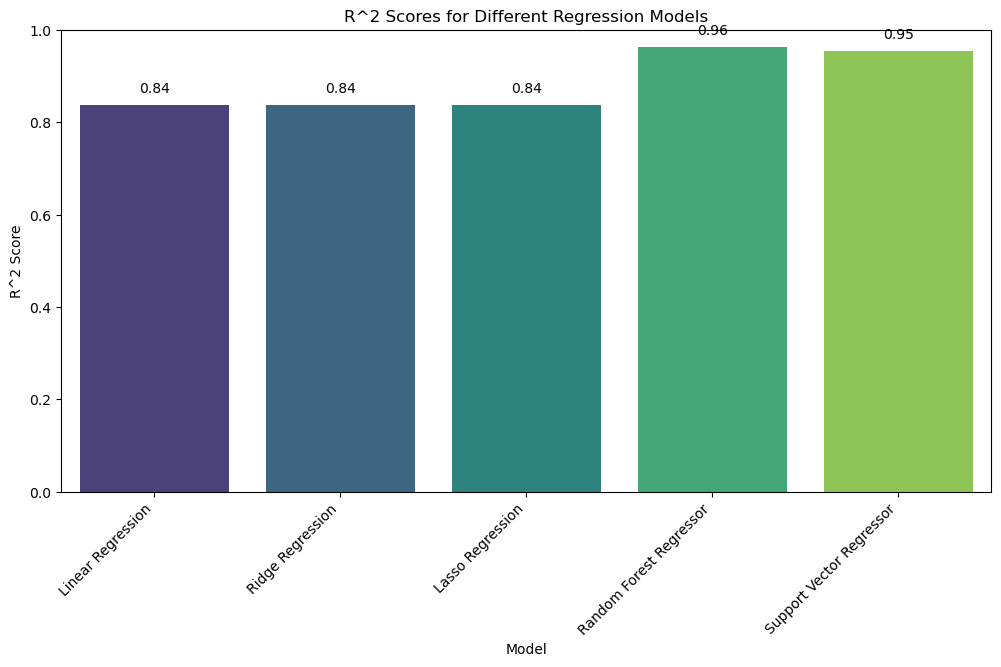

In [124]:
r2_scores = {
    'Linear Regression': results['Linear Regression']['R^2 Score'],
    'Ridge Regression': best_ridge_r2,
    'Lasso Regression': best_lasso_r2,
    'Random Forest Regressor': best_rf_r2,
    'Support Vector Regressor': best_svr_r2
}

r2_df = pd.DataFrame(list(r2_scores.items()), columns=['Model', 'R^2 Score'])

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='R^2 Score', data=r2_df, palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.02, f'{height:.2f}', ha='center', va='bottom')

plt.title('R^2 Scores for Different Regression Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.show()